<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Intro to `pandas` Review

_Authors: Dave Yerrington (SF), Kiefer Katovich (SF)_

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### A. Explore _Mad Men_ Cast Data

---

#### 1. Load the _Mad Men_ cast data into a `pandas` DataFrame.

In [5]:
cast_data_csv = '../datasets/mad-men-cast-show-data.csv'

In [6]:
cast = pd.read_csv(cast_data_csv)

#### 2. Print the head and tail of the data.

In [7]:
cast.head()

,Performer,Show,Show Start,Show End,Status?,CharEnd,Years Since,#LEAD,#SUPPORT,#Shows,Score,Score/Y,lead_notes,support_notes,show_notes
0,Steven Hill,Law & Order,1990,2010,END,2000,15,0,0,0,0.00,0,NaN,NaN,NaN
1,Kelli Williams,The Practice,1997,2014,END,2003,12,0,1,6,6.25,0.520833333,NaN,Any Day Now (2012),"Medical Investigation, Season 1; Lie To Me, Se..."
2,LisaGay Hamilton,The Practice,1997,2014,END,2003,12,2,0,2,4.00,0.333333333,"Life of a King, 2014; Go For Sisters, 2013",NaN,"Men of a Certain Age, Season 1-2"
3,Lara Flynn Boyle,The Practice,1997,2014,END,2003,12,0,0,0,0.00,0,NaN,NaN,NaN
4,Dylan McDermott,The Practice,1997,2014,END,2004,11,2,7,6,9.75,0.886363636,"Olympus Has Fallen, 2013; Freezer, 2014","The Messengers, 2007; Unbeatable Harold, 2009;...","Big Shots, Season 1; Dark Blue, Season 1-2; Am..."


In [8]:
cast.tail()

,Performer,Show,Show Start,Show End,Status?,CharEnd,Years Since,#LEAD,#SUPPORT,#Shows,Score,Score/Y,lead_notes,support_notes,show_notes
243,Meghan Wolfe,True Detective,2014,PRESENT,LEFT,2014,1,0,0,0,0.00,0,NaN,NaN,NaN
244,Kevin Dunn,True Detective,2014,PRESENT,LEFT,2014,1,0,1,2,2.25,2.25,NaN,"Draft Day, 2014","Veep, Season 3-4"
245,Charles Dance,Game of Thrones,2011,PRESENT,LEFT,2015,0,0,2,1,1.50,#DIV/0!,NaN,"Woman in Gold, 2015; Child 44, 2015","Deadline Gallipoli, Season 1"
246,Patrick Dempsey,Grey's Anatomy,2005,PRESENT,LEFT,2015,0,0,0,0,0.00,#DIV/0!,NaN,NaN,NaN
247,Ian McElhinney,Game of Thrones,2011,PRESENT,LEFT,2015,0,0,0,0,0.00,#DIV/0!,NaN,NaN,NaN


#### 3. Print the columns of the data.

In [9]:
cast.columns

Index([u'Performer', u'Show', u'Show Start', u'Show End', u'Status?',
       u'CharEnd', u'Years Since', u'#LEAD', u'#SUPPORT', u'#Shows', u'Score',
       u'Score/Y', u'lead_notes', u'support_notes', u'show_notes'],
      dtype='object')

#### 4. Rename any columns with spaces or special characters to not contain any.

In [10]:
import string
# the string library has default strings that contain all letters or numbers
uppercase = string.ascii_uppercase
lowercase = string.ascii_lowercase

cast.columns = [''.join([ch for ch in col if ch in uppercase+lowercase+' _']) for col in cast.columns]
# for each character in each column name join characters together 
# if they are in the string "uppercase+lowercase+' _'"
# basically removes anything that is not a letter, space or underscore.

cast.columns = map(lambda x: x.replace(' ', '_'), cast.columns)
# replaces spaces with underscores.

print cast.columns

Index([u'Performer', u'Show', u'Show_Start', u'Show_End', u'Status',
       u'CharEnd', u'Years_Since', u'LEAD', u'SUPPORT', u'Shows', u'Score',
       u'ScoreY', u'lead_notes', u'support_notes', u'show_notes'],
      dtype='object')


#### 5. Subset the data where the status of the show is not "END" or "End."

In [13]:
print cast.shape
subset = cast[(cast['Status'] != 'END') & (cast['Status'] != 'End')]
subset.shape

(248, 15)


(29, 15)

#### 6. Print out the performers where the show start is greater than 2005 and the score is greater than 7.

In [15]:
# double checking out dtypes to make sure they are correct.
cast.dtypes

Performer         object
Show              object
Show_Start         int64
Show_End          object
Status            object
CharEnd            int64
Years_Since        int64
LEAD               int64
SUPPORT            int64
Shows              int64
Score            float64
ScoreY            object
lead_notes        object
support_notes     object
show_notes        object
dtype: object

In [16]:
cast[(cast['Show_Start'] > 2005) & (cast['Score'] > 7)].Performer.unique()

array(['Scott Porter', 'Connie Britton', 'Amanda Seyfried',
       'Siobhan Finneran'], dtype=object)

#### 7. Select the performer and show column for the 20th-25th LABELED rows.

In [18]:
cast.loc[20:25, ['Show','Performer']]
cast.ix[20:25, ['Show','Performer']]

,Show,Performer
20,Joan of Arcadia,Mary Steenburgen
21,Six Feet Under,Mathew St. Patrick
22,Joan of Arcadia,Michael Welch
23,Joan of Arcadia,Aaron Himelstein
24,Joan of Arcadia,Becky Wahlstrom
25,Joan of Arcadia,Chris Marquette


#### 8. Plot a histogram of score.

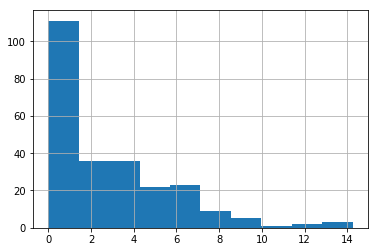

In [12]:
cast['Score'].hist()

### B. Explore San Francisco Crime Data

--- 

**9. Load the San Francisco crime data set into a DataFrame.**

In [13]:
crime_csv = '../datasets/sf_crime.csv'

In [16]:
crime = pd.read_csv(crime_csv)

**10. Look at the dimensions of the crime data.**

In [17]:
crime.shape

(25000, 9)

**11. Look at the data types of the columns and print out the column names.**

In [19]:
crime.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

In [20]:
crime.columns

Index([u'Dates', u'Category', u'Descript', u'DayOfWeek', u'PdDistrict',
       u'Resolution', u'Address', u'X', u'Y'],
      dtype='object')

**12. How many distinct districts are there?**

In [22]:
print crime.PdDistrict.unique()
print len(crime.PdDistrict.unique())

['BAYVIEW' 'NORTHERN' 'SOUTHERN' 'TARAVAL' 'MISSION' 'INGLESIDE' 'CENTRAL'
 'TENDERLOIN' 'RICHMOND' 'PARK']
10


**13. Which day of the week has the most crime?**

In [24]:
for day in crime.DayOfWeek.unique():
    print day, crime[crime.DayOfWeek == day].shape

 Sunday (3313, 9)
Tuesday (3548, 9)
Saturday (3496, 9)
Friday (3883, 9)
Monday (3524, 9)
Wednesday (3657, 9)
Thursday (3579, 9)


In [25]:
# Friday has the most crime.

#### 14. Make a new DataFrame featuring the crime categories and the number of crimes per category.

In [36]:
categories = np.unique(crime.Category.values)
counts = [crime[crime['Category'] == x].shape[0] for x in categories]
categories = pd.DataFrame({'crime_category':categories, 'crimes':counts})
print(categories.head())

  crime_category  crimes
0          ARSON      52
1        ASSAULT    2164
2     BAD CHECKS      14
3        BRIBERY       8
4       BURGLARY    1023


**15. Make a DataFrame that includes the districts and crime counts per district. Which district has the most crime?**

*Hint: You can use the `.sort_values()` function to sort your DataFrame by column.*

In [37]:
districts = np.unique(crime.PdDistrict.values)
counts = [crime[crime['PdDistrict'] == x].shape[0] for x in districts]
districts = pd.DataFrame({'district':districts, 'crimes':counts})
print(districts.head())

   crimes   district
0    2555    BAYVIEW
1    2424    CENTRAL
2    2256  INGLESIDE
3    3416    MISSION
4    3076   NORTHERN


In [40]:
districts.sort_values('crimes', ascending=False).head()

,crimes,district
7,4413,SOUTHERN
3,3416,MISSION
4,3076,NORTHERN
0,2555,BAYVIEW
1,2424,CENTRAL
